In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/DailyDelhiClimate.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
df=df[['date','meantemp']]
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


<function matplotlib.pyplot.show(close=None, block=None)>

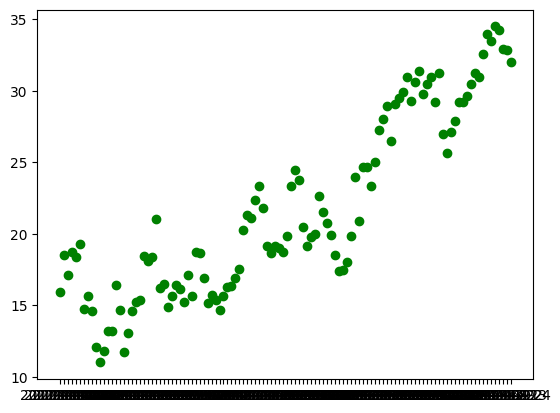

In [ ]:
plt.scatter(df['date'],df['meantemp'],color='green')
plt.show

In [ ]:
x1=df['meantemp'].ewm(alpha=0.9).mean()

In [ ]:
x2=df['meantemp'].ewm(alpha=0.5).mean()
x3=df['meantemp'].ewm(alpha=0.2).mean()

In [ ]:
x1

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

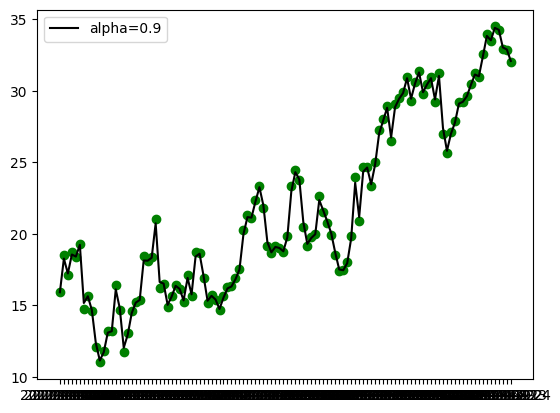

In [ ]:
plt.scatter(df['date'],df['meantemp'],color='green')
plt.plot(df['date'],x1,color='black',label='alpha=0.9')
plt.legend()
plt.show()

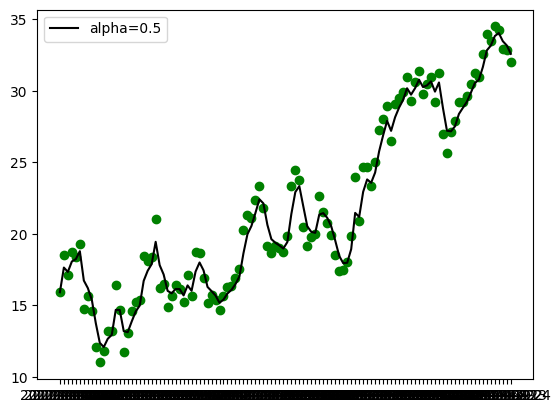

In [ ]:
plt.scatter(df['date'],df['meantemp'],color='green')
plt.plot(df['date'],x2,color='black',label='alpha=0.5')
plt.legend()
plt.show()

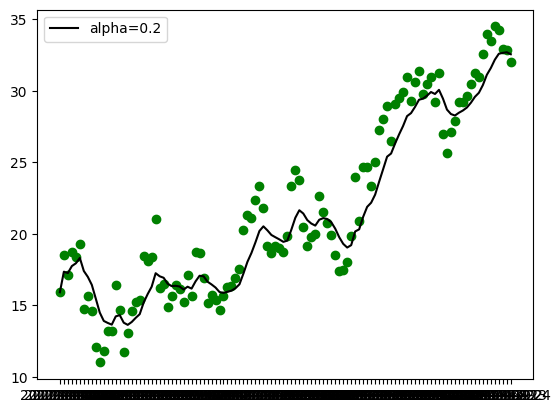

In [ ]:
plt.scatter(df['date'],df['meantemp'],color='green')
plt.plot(df['date'],x3,color='black',label='alpha=0.2')
plt.legend()
plt.show()

#All Optimization Method Together

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential
from keras.layers import *

(x_train,y_train),(x_test,y_test) =mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

input_shape = (28,28,1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Normalization
x_train = x_train/255.0
x_test = x_test /255.0


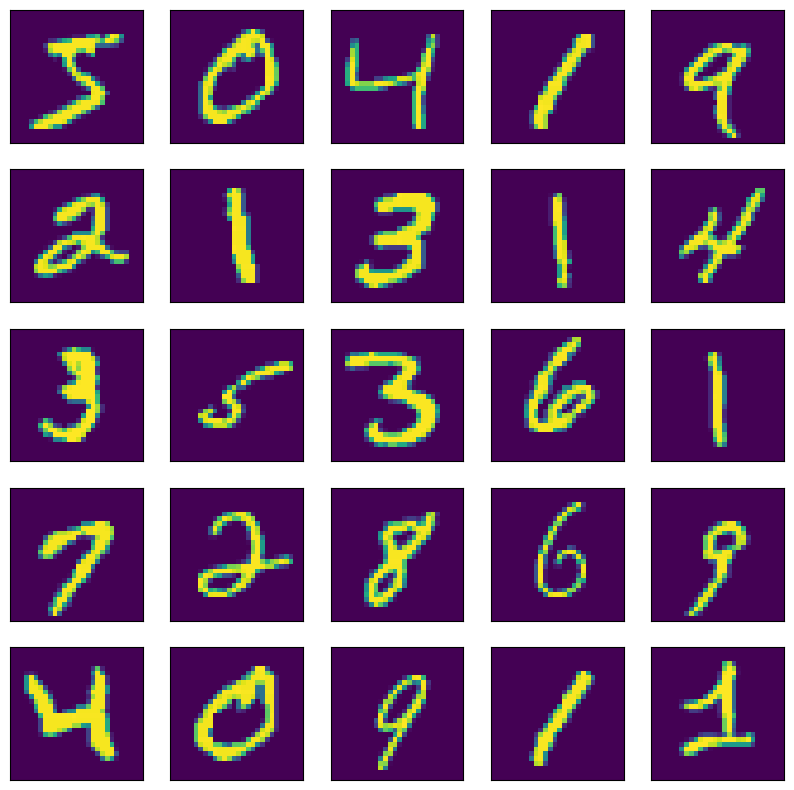

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])

plt.show()

In [ ]:
def build_model(optimizer):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(256, activation='relu', input_shape=input_shape))
  model.add(Dropout(0.25))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.50))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  return model

In [ ]:
# Final part - train the model and validate with test data
optimizers = ['SGD', 'Adadelta', 'Adagrad', 'RMSprop','Adam']

for i in optimizers:
  model = build_model(i)
  history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8351 - accuracy: 0.7441 - val_loss: 0.3318 - val_accuracy: 0.9080
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4010 - accuracy: 0.8826 - val_loss: 0.2474 - val_accuracy: 0.9296
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3226 - accuracy: 0.9060 - val_loss: 0.2108 - val_accuracy: 0.9398
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2750 - accuracy: 0.9190 - val_loss: 0.1821 - val_accuracy: 0.9473
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2447 - accuracy: 0.9281 - val_loss: 0.1643 - val_accuracy: 0.9502
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2207 - accuracy: 0.9358 - val_loss: 0.1498 - val_accuracy: 0.9544
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.1362 - val_acc

In [ ]:
# SGD : loss: 0.2333 - accuracy: 0.9336 - val_loss: 0.1599 - val_accuracy: 0.9526
# Adadelta : loss: 1.6580 - accuracy: 0.5301 - val_loss: 1.4807 - val_accuracy: 0.7265
# Adagrad : loss: 0.4531 - accuracy: 0.8647 - val_loss: 0.3105 - val_accuracy: 0.9128
# RMSProp : loss: 0.0691 - accuracy: 0.9815 - val_loss: 0.0886 - val_accuracy: 0.9809 *********
# Adam : loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.0696 - val_accuracy: 0.9790 **************************